In [1]:
!pip install pandas --upgrade
!pip install yfinance --upgrade
!pip install matplotlib --upgrade
!pip install ta --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 123.4 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 402.0 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 207.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 357.5 kB/s eta 0:00:000:0100:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.0
    Uninstalling lxml-4.9.0:
      Successfully uninstalled lxml-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-flavor 0.3.0 requires lazy-loader==0.1rc2, but you have lazy-loader 0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 628.3 kB/s eta 0:00:00:0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.6/243.6 kB 200.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=46ceb930b8dc4d83bd7e736d1ee6cd505d35ae9ee93c7bc2cb4db5c692c6a500
  Stored in directory: /Users/manikshakya/Library/Caches/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ta
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14,8]

/Users/manikshakya/anaconda3/envs/hgp/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
/var/folders/3_/4zcfm8q95td3zxq1xkmtz8kr0000gn/T/ipykernel_70261/1589943904.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': "Microsoft's common stock"}, xlabel='Date'>

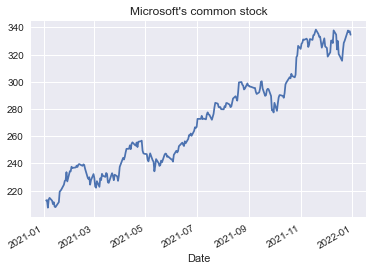

In [3]:
df=yf.download("MSFT",start="2021-01-01",end="2021-12-31")
df["Adj Close"].plot(title="Microsoft's common stock")

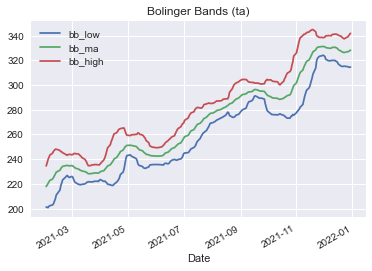

In [4]:
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"],
                                        window=20,
                                        window_dev=2)
ta_df = df.copy()

ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()
ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");